In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/ujjawala/Downloads/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print(df.columns)


Rows: 1025
Columns: 14
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model:", accuracy)


Accuracy of model: 0.8146341463414634


[[70 30]
 [ 8 97]]


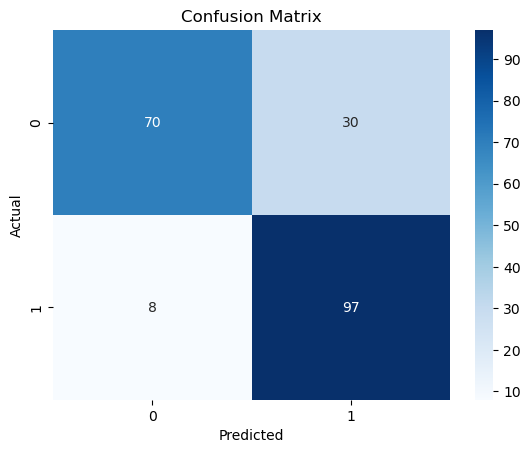

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


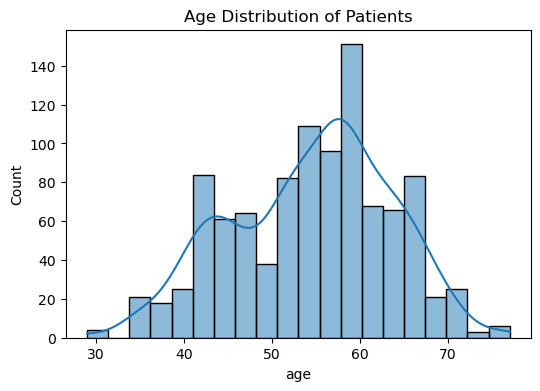

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.show()


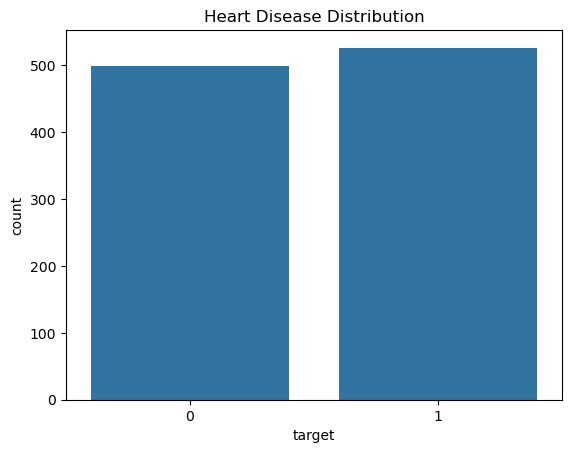

In [12]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()


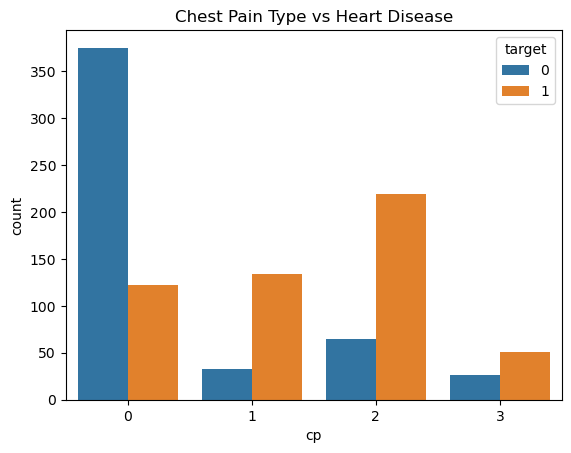

In [13]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


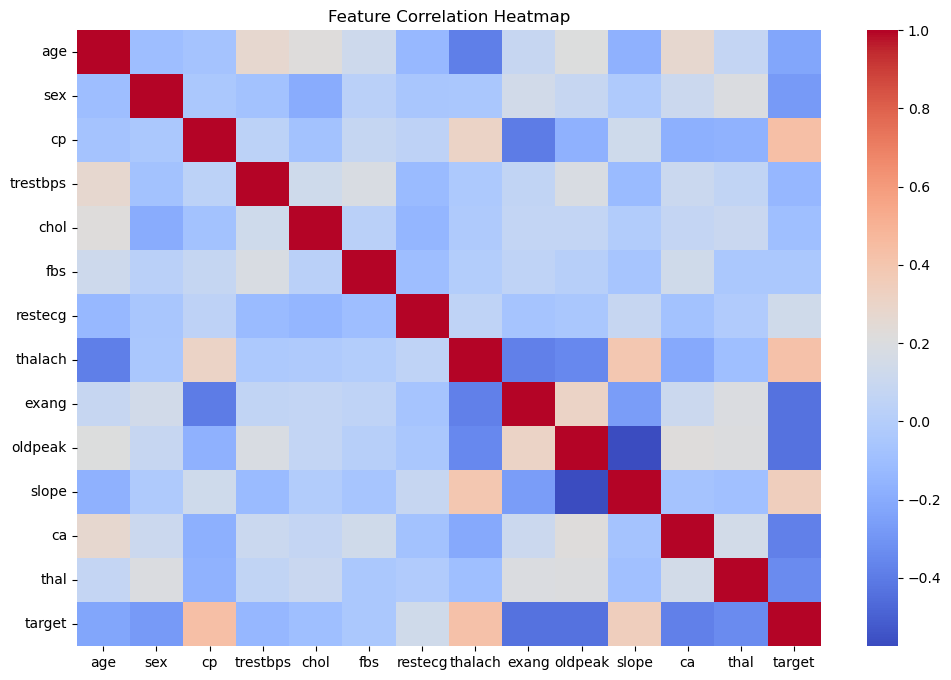

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.9853658536585366


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.697560975609756


In [17]:
sample_patient = [[52,1,2,130,250,0,1,187,0,2.3,0,0,2]]

prediction = model.predict(sample_patient)

if prediction[0]==1:
    print("Patient likely has Heart Disease")
else:
    print("Patient unlikely to have Heart Disease")


Patient likely has Heart Disease


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
